01 主成分分析(PCA)
================

* `主成分分析`：データセットの特徴量を相互に統計的に関連しないように回転する手法

    * 多くの場合、回転した後の特徴量から、データを説明するのに重要な特徴量の一部だけを抜き出す
    
* 以下の図に、`PCA`を合成2次元データセットに適用した例を示す

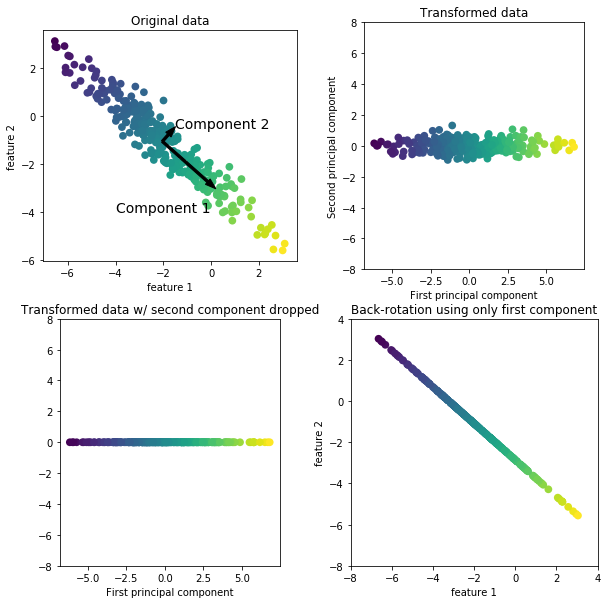

In [1]:
%matplotlib inline
import mglearn

mglearn.plots.plot_pca_illustration()

* 最初のプロットは(左上)、元のデータセットを表している
    
    * 区別がつきやすいように色がつけられている
    
* `PCA`のアルゴリズムは、まず最も分散が大きい方向を見つけ、それに「第1成分」というラベルを付ける

    * データはこの方向(ベクトル)に対して最も情報を持つ
    
    * つまり、この方向は、特徴量が最も相互に関係する方向である
    
* 次にアルゴリズムは、第1成分と直交する方向の中から、最も情報を持っている方向を探す

    * 2次元だと直交する方向は1つしかない
    
    * 多次元だと多くの直交する方向を持つ
    
* ここでは2つの成分は矢印で書かれているが、傾きと大きさが重要で、矢がどちらを向いていても関係ない

    * 第1成分を真ん中から右下にではなく、左上に向けても同じ
    
    * このようにして見つけていく「方向」を、`主成分`と呼ぶ
    
    * この方向がデータの分散が存在する主要な方向である
    
    * 一般には、元の特徴量と同じ数だけ主成分が存在する

* 2つ目のプロット(右上)は、同じデータを、最初の主成分が$x$軸に沿い、2つ目の主成分が$y$軸に沿うように回転させたもの

* 原点の周辺にデータが来るように、回転させる前にデータから平均値を引いてある

* `PCA`で見つかった回転後の表現では、2つの軸の相関はない

    * つまり、この表現でのデータの相関行列は、対角成分をのぞいてゼロである

* 主成分のうちいくつかだけを残すことで、`PCA`を次元削減に使うこともできる

* この例では、左下のパネルに示すように、1つ目の主成分だけを残す

* このようにすると、2次元のデータセットが1次元になる

* ただし、元の特徴量のうち1つを残している訳ではなく、最も興味深い方向(1枚目のパネルの左下から右下の向き)、すなわち第1主成分を見つけ、その方向を維持している

* 逆回転して平均を足し、データを元に戻すこともできる

    * これは図の最後のパネルに示したデータのこと
    
    * データポイントは元の特徴量空間にあるが、第1主成分に含まれている情報しか維持されていない
    
    * このような変換は、データからノイズを取り除いたり、主成分で維持された情報を可視化するために用いられることがある

## 1. cancerデータセットのPCAによる可視化

* `PCA`の最も一般的なアプリケーションは、高次元データセットの可視化

    * cancerデータセットでは、特徴量が30もあるので、$30 \times 29 /2 = 435$の散布図ができてしまう
    
    * しかし、特徴量ごとに2つのクラス(良性と悪性)のヒストグラムを書くと単純な可視化となる

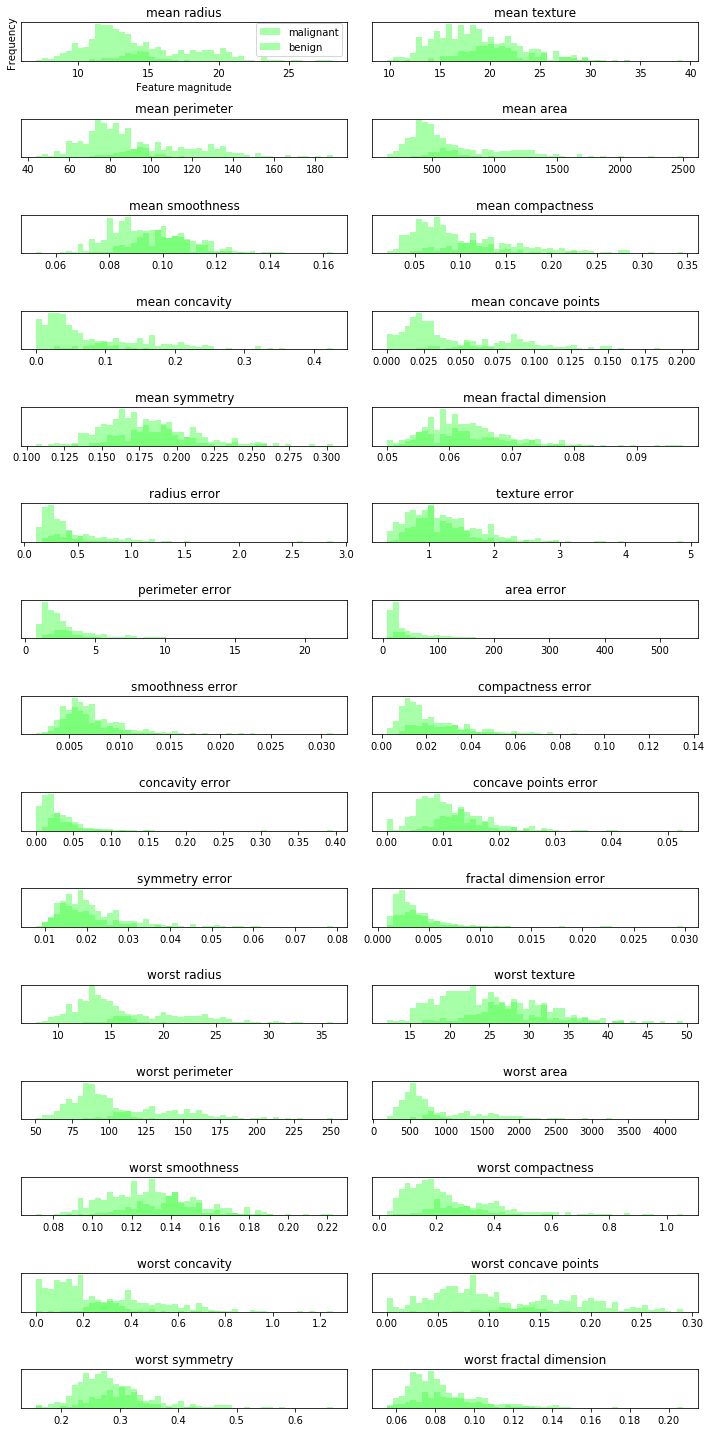

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

* 個々のデータポイントの特徴量が`特定のレンジ(ビン)`に何回入ったかを数えることで、特徴量ごとにヒストグラムを作っている

    * 個々のプロットには「良性クラス：緑」と「悪性クラス：青」に属する点のヒストグラムが重ねられている
    
    * これによって、個々の特徴量の2つのクラスに対する分布がわかり、どの特徴量が良性と悪性を見分けるのに役に立ちそうかを類推することができる
    
        * 例)「smoothness error」：ほとんど重なっているので、あまり情報がない
    
        * 例)「worst concave points」：ほとんど重なっていないので、情報が多い

* このプロットだけでは、個々の特徴量の相関や、それがクラス分類に与える影響については何もわからない

    * `PCA`を用いると、主な相関を捉えることができるので、もう少し全体像が見やすくなる
    
    * 最初の2成分を用いて、2次元空間上の1つの散布図として見てみる

* `PCA`を適用する前に、データを`StandardScaler`でスケール変換し、個々の特徴量の分散が1になるようにする

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

* `PCA変換`の学習と適用は、PCAオブジェクトを生成し、`fit`メソッドを呼び出して主成分を見つけ、`transform`メソッドを呼んで回転と次元削減を行う

    * デフォルトでは、`PCA`はデータの回転(とシフト)しか行わず、全ての主成分を維持する
    
    * データの次元削減を行うには、PCAオブジェクトを作る際に、維持する主成分の数を指定する必要がある

In [4]:
from sklearn.decomposition import PCA

# データの最初の2つの主成分だけ維持する
pca = PCA(n_components=2)

# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape:{}".format(str(X_scaled.shape)))
print("Reduced shape:{}".format(str(X_pca.shape)))

Original shape:(569, 30)
Reduced shape:(569, 2)


* これで、最初の2つの主成分に対してプロットできる

Text(0, 0.5, 'Second principal component')

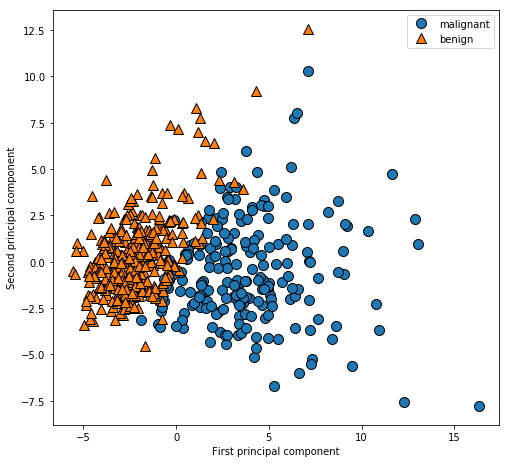

In [6]:
# 第1主成分と第2主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect('equal')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* `malignant`：悪性、`benign`：良性

* `PCA`は教師なし手法であるので、適切な回転を発見する際には全くクラス情報を用いていない

    * データの相関を見ているだけ
    
    * この散布図では、第1主成分に対して第2主成分を、クラス情報を使って色分けしてプロットしている
    
    * この2次元空間では、この2つのクラスがきれいに分離できている
    
    * これを見れば、(この空間での直線を学習する)線形クラス分類器でもそれなりに分類できる可能性がある
    
    * また、`悪性`のデータポイントは、`良性`のデータポイントよりも広がっていることもわかる
    
* `PCA`の欠点は、プロットした2つの軸の解釈が容易ではない場合が多いこと

    * 2つの主成分の方向はもとのデータの方向に対応しており、もとの特徴量の組み合わせにすぎない
    
    * しかし、この組み合わせについては一般に非常に複雑
    
    * 主成分は、`PCA`の適合を行う過程で、`components_`属性に格納される

In [7]:
print("PCA component shape:{}".format(pca.components_.shape))

PCA component shape:(2, 30)


* `components_`のそれぞれの行が1つの主成分に対応する

    * 行は、重要度によってソートされている(第1主成分が最初にくる)
    
    * 列は、`PCA変換`する前の元の特徴量に対応する
        
        * この例では、「`mean_radius`」、「`mean texture`」など
    
* `components_`の中身は、以下のとおり

In [8]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


* 係数をヒートマップで見ることもできる

Text(0, 0.5, 'Principal components')

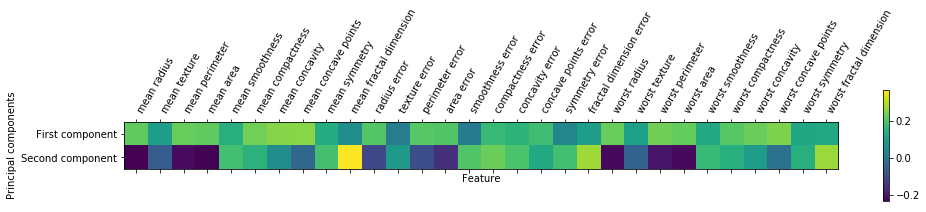

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

* 第1主成分を見ると、全ての特徴量が同じ符号になっていることがわかる

    * これは、すべての特徴量に一般的な相関があることを意味する
    
    * ある特徴量が大きければ、他の特徴量も大きくなる傾向がある
    
* 第2主成分の符号は入り混じっている

* また、両方とも30の特徴量全てが混ざっている

## 2. 固有顔による特徴量抽出

* `PCA`のもう1つの利用方法は、特徴量抽出であった

    * 特徴量抽出の背後には、データには与えられた元々の表現よりも、解析に適した表現があり、それを見つけることが可能である
    
    * 特徴量抽出が効果を持つアプリケーションとしては、画像関連があげられる
    
    * 画像はピクセルで構成されており、通常はRGBとして格納されている
    
    * 画像の中の対象物は通常数千ものピクセルで構成されており、それらが集まって初めて意味を持つ

* `PCA`を用いた画像からの特徴量抽出のとても簡単なアプリケーションを見てみる

    * これには、`Labeled Faces in the Wild`データセットの顔画像を用いる
    
    * 以下に、画像の例を示す(グレースケールの画像、サイズは小さくした)

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

* 画像は62人分であわせて3,023枚ある

* サイズは87×65ピクセル

In [ ]:
print("people.images.shape: {}".fomat(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

* しかし、このデータセットは少し偏っており、ジョージ・W・ブッシュとコリン・パウエルの画像が多い

In [ ]:
import numpy as np

# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)

# ターゲット名と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i + 1) % 3 == 0:
        print()

* 偏りを減らすために、各人の画像を50に制限する

    * こうすることで、特徴量抽出がジョージ・W・ブッシュの特徴に偏らなくなる

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうした方が、数値的に安定する
X_people = X_people / 255.

* 顔認識の一般的なタスクとして、見たことのない顔が、DB中の人物と一致するかを判別するタスクがある

    * このタスクは、写真管理、ソーシャルメディア、セキュリティに応用できる
    
    * この問題を解く1つの方法は、個々の人物を異なるクラスとして、クラス分類器を訓練すること
    
    * しかし、多くの場合、顔DBにはたくさんの人物が登録されており、同じ人物の画像は少ない
    
    * このような場合、ほとんどのクラス分類器は訓練が難しくなる
    
    * さらに、新しい人を追加したくなることもある
    
    * この場合、大きなモデルを再訓練するのは大変である

* 簡単な方法として、`1-最近傍法クラス分類器`を使う方法がある

    * クラス分類しようとしている顔に一番近い物を探す
    
    * このクラス分類器は、理論的にはクラスごとに訓練サンプルが1つだけあれば機能する
    
    * `KNeighborsClassifier`がうまく機能するかを確認する

In [ ]:
from sklean.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

* 精度は27%であった。これは62クラス分類であることを考えると、それほど悪くもないが、それほど良くもない

    * 4回に一度しか人物を特定できない
    
* ここで、`PCA`を用いる

    * 元のピクセルの空間で距離を計算するのは、顔の近似度を測るのは全く適していない
    
    * ピクセル表現で2つの画像を比較するということは、相互の画像の対応するピクセルの値を比較することになる
    
    * この表現は、人間が顔画像を解釈する方法と異なるし、顔の特徴をこのような生の表現から捉えるのは難しい
    
    * 例)ピクセルで距離を測ると、1ピクセル顔を右にずらすだけで表現が全く変化していまい、大きく変化したことになる
    
* 主成分に沿った距離を使うことで、精度が上げられないかを試してみる

    * ここでは、PCAの`whiten`オプションを使う
    
    * これを使うと、主成分が同じスケールになるようにスケール変換する
    
    * PCAによる変換後に`StandardScaler`をかけるのと同じ
    
    * `whiten`オプションを付けると、データを回転するだけでなく、楕円ではなく円を描くようにスケール変換することになる

In [ ]:
mglearn.plots.plot_pca_whitening()

* PCAオブジェクトを訓練し、最初の100成分を抜き出す

    * そして、訓練データとテストデータを変換する

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

* 新しいデータは100の特徴量を持つ
    
    * 主成分の最初の100要素である
    
    * この新しい表現を使って、`1-最近傍法クラス分類器`にかけてみる

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

* 精度は27%から36%になった

    * このことは、主成分がデータのより良い表現となっている
    
* 画像データについては、見つけた主成分を容易に可視化することができる

    * 主成分が、入力空間の方向に対応する
    
    * ここでの入力空間は、87×65ピクセルのグレースケール画像なので、この空間での方向は、87×65ピクセルのグレースケール画像となる
    
    * 最初のいくつかの主成分を見てみる

In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))

In [ ]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

* これらが顔画像のどの側面を捉えているか、全てを理解することは難しいが、いくつかに関しては推測することができる

    * 例)最初の主成分は、顔と背景のコントラストをコーディングしている
    
    * 例)2つ目の主成分は、光の当たり方による顔の左右の明るさの差をコーディングしている
    
    * このような表現は、生のピクセル値に比べればいくらか意味をもつが、人間が顔を認知する方法とは、やはりかけ離れている
    
* PCAモデルはピクセルに基づいている

    * ピクセルでの表現された2つの画像の差には、顔のアライメント(目、顎、鼻の位置)や光の当たり具合はそれほど重視されていない
    
    * 人間が顔が似ているかどうかを判断するには、年齢や性別、表情、髪型などの、ピクセルの明るさから推測することが難しいような属性を使っている
    
    * アルゴリズムがデータを解釈する方法は、多くの場合人間の解釈する方法とは全く異なっている

* PCA変換は回転させてから分散が小さい成分を落とす物であった

* もう一つPCAの有用な解釈がある

    * PCAは、テストデータポイントを主成分の重み付き和として表現する、`一連の数字`(PCAで回転後の新しい特徴量)を見つける手法
    
    ここに画像を入れる

    * ここで、$x_0$、$x_1$などは、このデータポイントを主成分で表現する際の係数(回転後の空間におけるこの画像の表現)
    
* PCAモデルを理解するために、主成分の一部だけを使って元画像を表現してみる

    * 主成分のいくつかだけ残したものを逆回転してもとの空間に戻す
    
    * この元の特徴空間へ戻す作業は、`inverse_transform`メソッドで行うことができる
    
    * 顔画像をそれぞれ10、50、100、500個の主成分を用いて再構成したものを示す

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

* 10主成分だけを用いた場合には、顔の向きや光の当たり具合などの、画像の概要しかわからない

    * 主成分を増やしていくにつれ、画像の詳細が再構成される
    
    * これは、より多くの項を入れることに対応する
    
    * ピクセル数と同数の主成分を使うことは、回転後に情報を全く落とさないことを意味し、画像は完全に再構成される

* cancerデータセットで行ったのと同様に、PCAを用いてデータセット中の全ての顔を最初の2つの主成分を用いて散布図をプロットしてみる

    * クラスは画像中の人物である

In [ ]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* この図を見ればわかる通り、最初の2成分だけでは、データ全体がひとまとまりになってしまい、クラスを分離できそうにない

    * 図で見たとおり、10の主成分を用いても、PCAでは、顔の非常に粗い特徴しか捉えられない

| 版 | 年/月/日 |
|----|----------|
|初版|2019/03/17|